In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'IXIC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-13 00:00:00-04:00,11357.730469,11773.110352,11238.440430,11630.509766,24847560000,0.0,0.0
2023-03-20 00:00:00-04:00,11614.389648,12013.990234,11550.690430,11823.959961,24063200000,0.0,0.0
2023-03-27 00:00:00-04:00,11868.540039,12227.929688,11635.030273,12221.910156,23120800000,0.0,0.0
2023-04-03 00:00:00-04:00,12146.089844,12224.679688,11898.360352,12087.959961,17356590000,0.0,0.0
2023-04-10 00:00:00-04:00,11975.129883,12205.719727,11916.540039,12123.469727,23519530000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,19668.179688,20045.759766,19415.480469,20026.769531,43161600000,0.0,0.0
2025-02-17 00:00:00-05:00,20090.550781,20110.119141,19510.910156,19524.009766,32644990000,0.0,0.0
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18372.990234,18847.279297,38388460000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,7392.729980,7422.200195,6686.359863,6879.520020,24512120000,0.0,0.0
2020-03-23 00:00:00-04:00,6847.279785,7809.830078,6631.419922,7502.379883,21476910000,0.0,0.0
2020-03-30 00:00:00-04:00,7583.459961,7880.310059,7288.109863,7373.080078,18566200000,0.0,0.0
2020-04-06 00:00:00-04:00,7660.169922,8227.910156,7617.790039,8153.580078,15567990000,0.0,0.0
2020-04-13 00:00:00-04:00,8127.689941,8670.299805,8035.950195,8650.139648,18706100000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,19668.179688,20045.759766,19415.480469,20026.769531,43161600000,0.0,0.0
2025-02-17 00:00:00-05:00,20090.550781,20110.119141,19510.910156,19524.009766,32644990000,0.0,0.0
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18372.990234,18847.279297,38388460000,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00-04:00,7392.729980,7422.200195,6686.359863,6879.520020,24512120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,6847.279785,7809.830078,6631.419922,7502.379883,21476910000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00-04:00,7583.459961,7880.310059,7288.109863,7373.080078,18566200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00-04:00,7660.169922,8227.910156,7617.790039,8153.580078,15567990000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00-04:00,8127.689941,8670.299805,8035.950195,8650.139648,18706100000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,19668.179688,20045.759766,19415.480469,20026.769531,43161600000,0.0,0.0,18841.884766,18124.154785,19609.409668,15896.272461,21837.291992
2025-02-17 00:00:00-05:00,20090.550781,20110.119141,19510.910156,19524.009766,32644990000,0.0,0.0,19082.640625,18163.367188,19625.999512,15969.418701,21819.947998
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18372.990234,18847.279297,38388460000,0.0,0.0,19189.900391,18265.674805,19625.999512,16225.187744,21666.486572


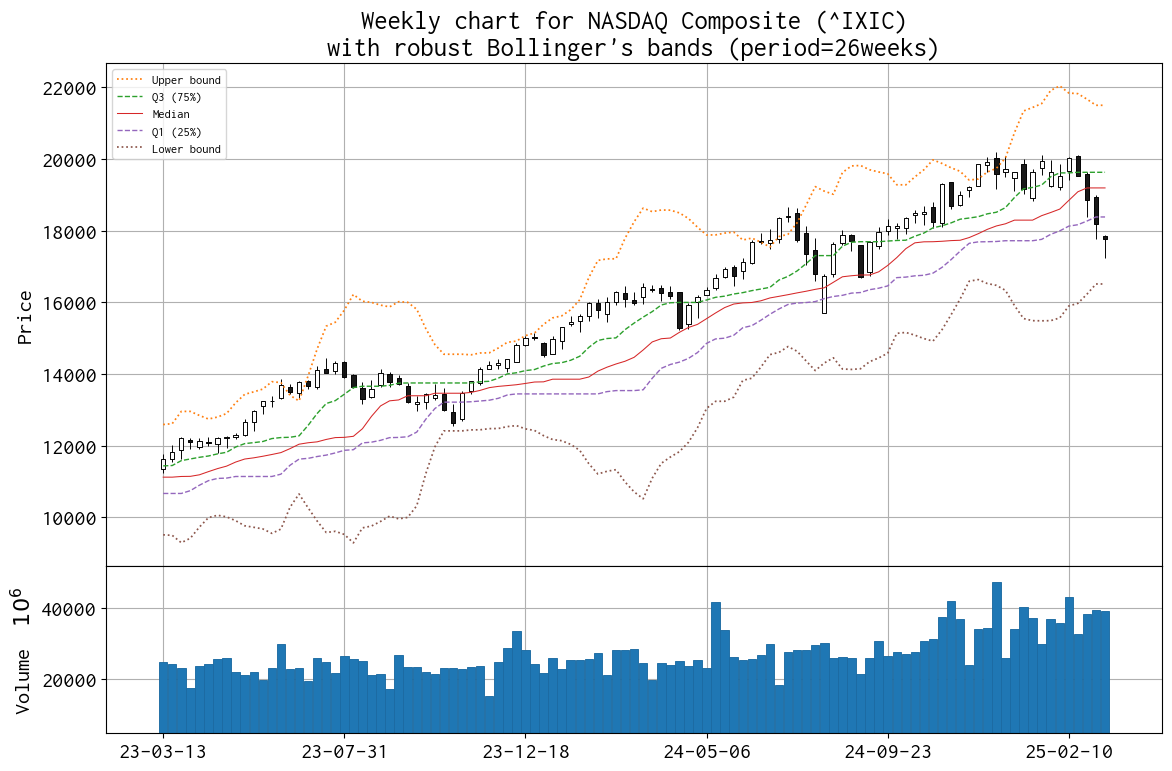

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

"""
apds  = [
    mpf.make_addplot(mv_upper[df.index], width=0.75, label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=0.75, label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=0.75, label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=0.75, label='Lower bound', ax=ax[0]),
]   
"""
apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00-05:00,20090.550781,20110.119141,19510.910156,19524.009766,32644990000,0.0,0.0
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18535.224609,18544.417969,29290431000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00-05:00    19524.009766
2025-02-24 00:00:00-05:00    18544.417969
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00-05:00           NaN
2025-02-24 00:00:00-05:00   -979.591797
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00-05:00   -1046.431641
dtype: float64

In [9]:
df['Close'].rolling(13).mean()

Date
2023-02-27 00:00:00-05:00             NaN
2023-03-06 00:00:00-05:00             NaN
2023-03-13 00:00:00-04:00             NaN
2023-03-20 00:00:00-04:00             NaN
2023-03-27 00:00:00-04:00             NaN
                                 ...     
2025-01-27 00:00:00-05:00    19481.929838
2025-02-03 00:00:00-05:00    19500.131460
2025-02-10 00:00:00-05:00    19603.719952
2025-02-17 00:00:00-05:00    19643.747596
2025-02-24 00:00:00-05:00    19591.920523
Name: Close, Length: 105, dtype: float64

In [10]:
df['Close'].rolling(26).mean()

Date
2023-02-27 00:00:00-05:00             NaN
2023-03-06 00:00:00-05:00             NaN
2023-03-13 00:00:00-04:00             NaN
2023-03-20 00:00:00-04:00             NaN
2023-03-27 00:00:00-04:00             NaN
                                 ...     
2025-01-27 00:00:00-05:00    18669.427209
2025-02-03 00:00:00-05:00    18776.277194
2025-02-10 00:00:00-05:00    18868.394456
2025-02-17 00:00:00-05:00    18931.710637
2025-02-24 00:00:00-05:00    18963.664438
Name: Close, Length: 105, dtype: float64

In [11]:
df['Close'].rolling(52).mean()

Date
2023-02-27 00:00:00-05:00             NaN
2023-03-06 00:00:00-05:00             NaN
2023-03-13 00:00:00-04:00             NaN
2023-03-20 00:00:00-04:00             NaN
2023-03-27 00:00:00-04:00             NaN
                                 ...     
2025-01-27 00:00:00-05:00    17685.353816
2025-02-03 00:00:00-05:00    17753.291128
2025-02-10 00:00:00-05:00    17835.043419
2025-02-17 00:00:00-05:00    17902.873986
2025-02-24 00:00:00-05:00    17946.517785
Name: Close, Length: 105, dtype: float64

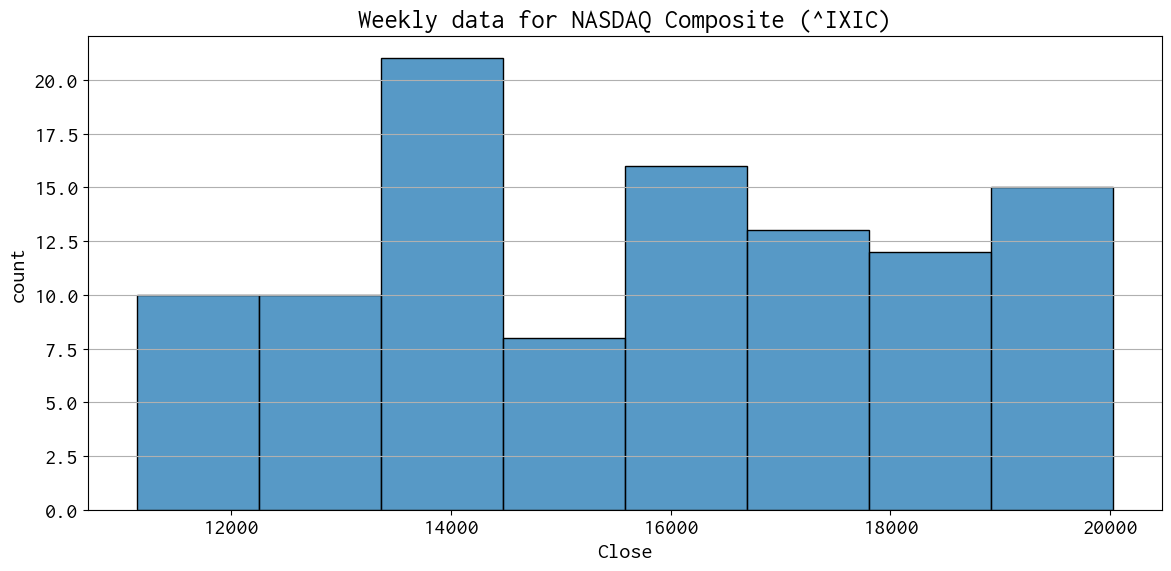

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

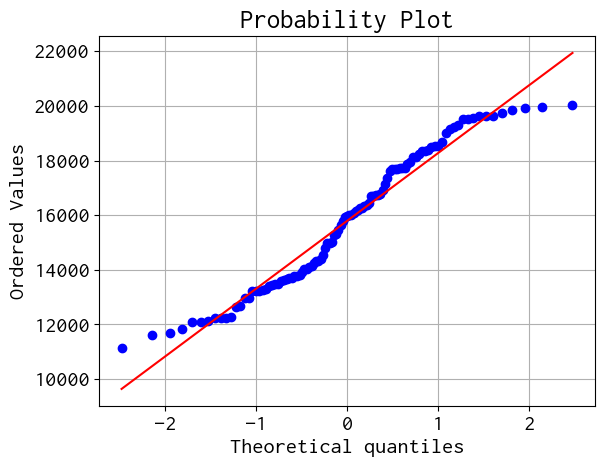

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9522900152249594, p-value: 0.0008443145330366431
